<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula18a_perceptron_vetorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
crgb = LinearSegmentedColormap.from_list('custom_cmap', colors)

In [2]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, xlim=(-0.15, 1.15), ylim=(-0.15, 1.15)):
  plt.figure(figsize=(6,6))
  plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, cmap=crgb)
  plt.xlim(*xlim)
  plt.ylim(*ylim)



[ 1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1]


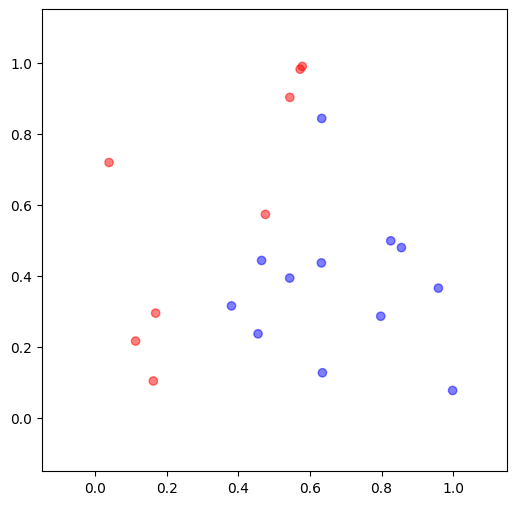

In [5]:
import numpy as np

def create_dataset(n=20, tilt=[2,1], intercept=0):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(tilt) - [0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

X, y = create_dataset(intercept=-0.4)
print(y)
plot_dataset(X, y)
plt.show()

In [6]:
def plot_hyperplan(vector, intercept, xs=[0,1]):
  xs = np.array(xs)
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'k--')


In [13]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class PLA(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100, learning_rate=0.01):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    self.w_ = np.zeros(X.shape[1])
    self.bias_ = 0
    for _ in range(self.max_iter):
      cost = 0
      idx = np.arange(X.shape[0])
      np.random.shuffle(idx)
      for i in idx:
        ypred = self.predict([X[i]])
        error = y[i] - ypred[0]
        if error:
          self.w_ += error * X[i] * self.learning_rate
          self.bias_ += error * self.learning_rate
          cost += error**2
      if cost == 0:
        break
      ypred = self.predict([X[idx]])

  def predict(self, X):
    ypred = np.sign(X @ self.w_ + self.bias_)
    return np.array(ypred, dtype=int)

  def score(self, X, y):
    ypred = self.predict(X)
    return accuracy_score(y, ypred)


[0.37216165 0.12446466] -0.02118490828797004
[ 0.50656465 -0.16706557] -0.030000000000000002
1.0
1.0


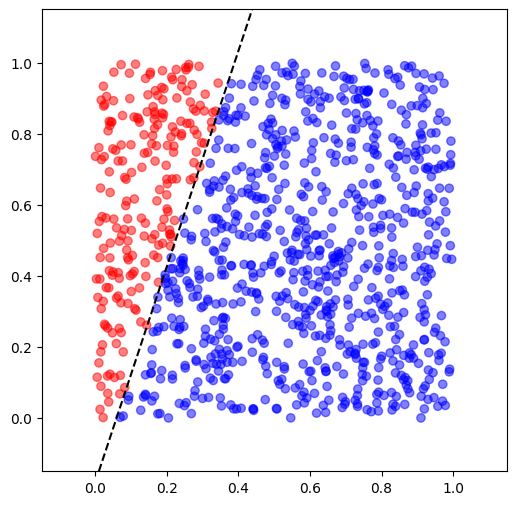

In [86]:
tilt = np.random.uniform(size=(2,), low=-1, high=1)
intercept = np.random.uniform(size=(1,1), low=-0.1, high=0.1)[0,0]
print(tilt, intercept)
X, y = create_dataset(1000, tilt=tilt, intercept=intercept)
model = PLA()
model.fit(X, y)
print(model.w_, model.bias_)
ypred = model.predict(X)
print(model.score(X, y))

X_test, y_test = create_dataset(1000, tilt=tilt, intercept=intercept)
print(model.score(X_test, y_test))
plot_dataset(X_test, y_test)
plot_hyperplan(model.w_, model.bias_)
plt.show()

[-0.63192088 -0.66793874] -0.06696566249025232
[[-0.16148483]
 [ 0.06243451]] [0.04]
1.0
0.835


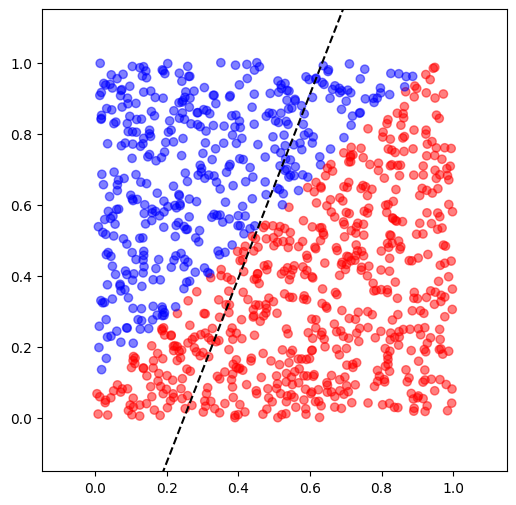

In [149]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100, learning_rate=0.01):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    self.w_ = np.zeros(shape=(X.shape[1],1))
    self.bias_ = np.zeros(shape=(1,))
    y = y.reshape(-1, 1)
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      error = (y - ypred).reshape(-1,1)
      self.w_ += X.T @ error * self.learning_rate
      self.bias_ += np.sum(error) * self.learning_rate
      cost = np.sum(error**2)
      if cost == 0:
        break

  def predict(self, X):
    ypred = np.sign(X @ self.w_ + self.bias_)
    return np.array(ypred, dtype=int)

  def score(self, X, y):
    ypred = self.predict(X)
    return accuracy_score(y, ypred)

tilt = np.random.uniform(size=(2,), low=-1, high=1)
intercept = np.random.uniform(size=(1,1), low=-0.1, high=0.1)[0,0]
print(tilt, intercept)
X, y = create_dataset(20, tilt=tilt, intercept=intercept)
model = Perceptron()
model.fit(X, y)
print(model.w_, model.bias_)
ypred = model.predict(X)
print(model.score(X, y))

X_test, y_test = create_dataset(1000, tilt=tilt, intercept=intercept)
print(model.score(X_test, y_test))
plot_dataset(X_test, y_test)
plot_hyperplan(model.w_, model.bias_)
plt.show()

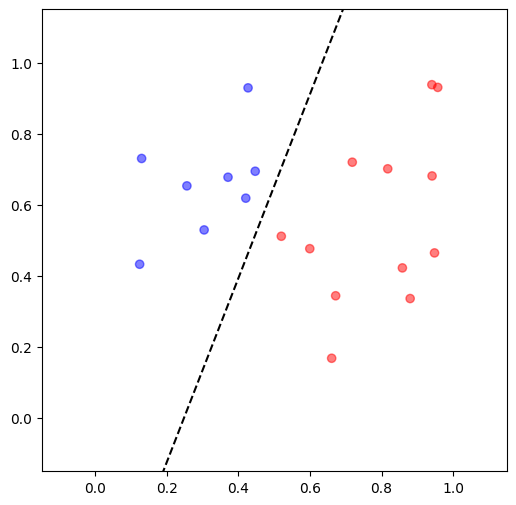

In [150]:
plot_dataset(X, y)
plot_hyperplan(model.w_, model.bias_)
plt.show()